In [1]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt


import sklearn
import scipy.sparse as sparse
from sklearn import mixture
import itertools
from scipy import linalg
import matplotlib as mpl


/Users/leilasapple/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/leilasapple/.matplotlib/matplotlibrc", line #621
  (fname, cnt))


import zipfile
zip_ref = zipfile.ZipFile('train.csv.zip', 'r')
zip_ref.extractall('../Fraud Detection/adtracking-fraud-detection-master/')
zip_ref.close()

In [2]:
data_set=pd.read_csv('../Fraud Detection/train_sample.csv')

In [3]:
data_set.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [5]:
#Counting how many class 1 
data_set.attributed_time.count()

227

In [6]:
data_set.count()

ip                 100000
app                100000
device             100000
os                 100000
channel            100000
click_time         100000
attributed_time       227
is_attributed      100000
dtype: int64

In [7]:
print(data_set.nunique(),'\n\n')
unique_val=data_set.iloc[:,[1,2,3,4,6,7]].nunique()
print(list(unique_val.keys()))
print(list(unique_val.values))

ip                 34857
app                  161
device               100
os                   130
channel              161
click_time         80350
attributed_time      227
is_attributed          2
dtype: int64 


['app', 'device', 'os', 'channel', 'attributed_time', 'is_attributed']
[161, 100, 130, 161, 227, 2]


In [8]:
len(data_set)-data_set.click_time.nunique()

19650

Text(0.5, 1.0, 'The number of unique values of features')

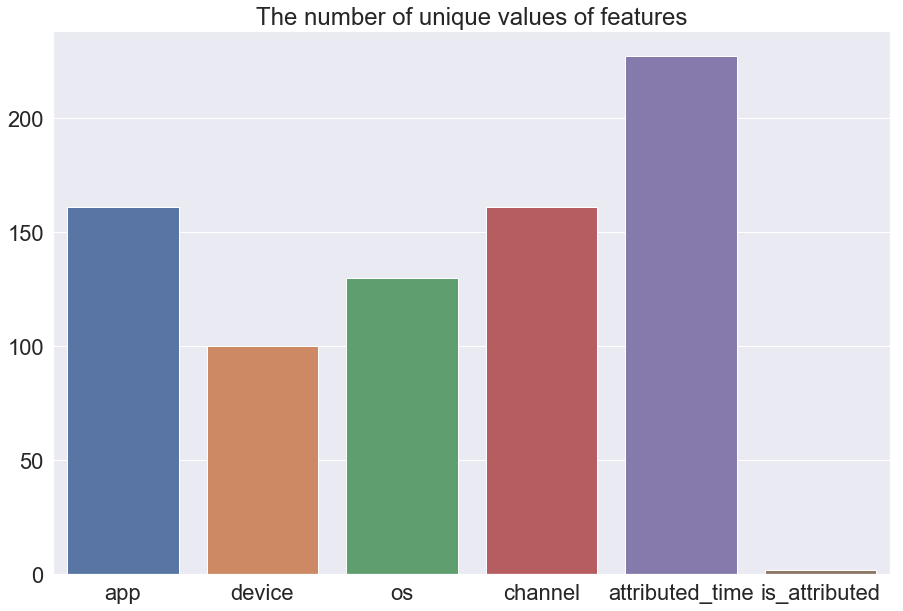

In [9]:

xtick_label=list(unique_val.keys())
sns.set(font_scale=2)
fig=plt.figure(figsize=(15,10))
ax = sns.barplot(x=xtick_label,y=list(unique_val.values))
plt.title('The number of unique values of features')

In [10]:
data_set.app.unique()

array([ 12,  25,  13,   3,   1,   9,   2,   6,  20,  14,  64,   7,  15,
        18,  11,   8,  23,  21,  56,  28,  36,  22,  26,  17,  27,  10,
        60,  58,  19,  32,  24,   4,  53, 125, 204,   5, 202,  70,  47,
        29,  55, 103,  35,  83, 208, 146, 161,  46,  62,  65, 110,  42,
       150, 266, 151, 148,  72, 310,  93,  94,  71,  43,  39, 170,  37,
        68,  54, 107, 398, 160,  30, 183, 315,  45, 121,  38,  82, 134,
        33, 233, 100,  44, 109,  59,  74,  61, 104,  66,  67, 273, 192,
        50, 118, 372,  48, 232, 165,  91, 123,  88, 538,  49,  16, 105,
       536, 216, 425, 117, 551,  99,  86, 101, 394,  78,  95, 181,  76,
        34, 124, 548, 108,  85, 145,  79,  97,  75,  52, 215,  84,  96,
        81, 139, 267,  80, 137, 119, 474, 158, 293, 122, 112, 149, 363,
       271,  31, 171,  87, 168, 176, 347, 163, 190, 486, 133, 302, 268,
       407, 116,  92, 115, 261])

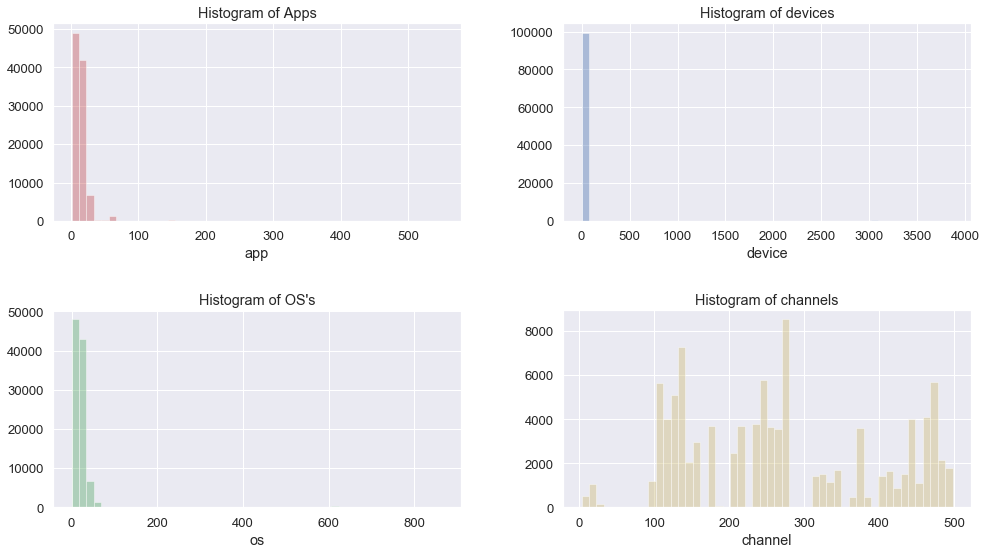

In [11]:
sns.set(font_scale=1.2)
fig, axes = plt.subplots(2,2,figsize=(15,8))
sns.distplot(data_set.app,label='App',kde=False,ax=axes[0, 0],color='r')
axes[0, 0].set_title('Histogram of Apps')

sns.distplot(data_set.device,label='Device',kde=False,ax=axes[0, 1],color='b')
axes[0, 1].set_title('Histogram of devices')

sns.distplot(data_set.os,label='OS',kde=False,ax=axes[1, 0],color='g')
axes[1, 0].set_title('Histogram of OS\'s')

sns.distplot(data_set.channel,label='Channel',kde=False,ax=axes[1, 1],color='y')
axes[1, 1].set_title('Histogram of channels')


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.25)

So far we had 6 categorical features and two temporal features. 

## Problems
- We need to get rid of categorical features eighther by labeling them or converting them to the numerical values.
- Temporal feaures can be used to extarct other features. They have string type so we need to convert them to date and time. 
- The data are imbalanced. So we need to oversample/undersample or SMOTE resample the data set.
- We need to define the device or the persons who clicks. It can be defined as per device and os. 
- When we defined the clicker, we can identify the fradualnt clicker by for example the time difference between two consecutive clicks.
- We can remove the fradualnts
- run our model

In [12]:
#data_set.device.value_counts().sort_values()

In [13]:
#data_set.app.value_counts().sort_values()

In [14]:
#data_set.os.value_counts().sort_values()

### Converting click_time to datetime type

In [15]:

from datetime import datetime,timedelta
data_set.attributed_time=pd.to_datetime(data_set.attributed_time)
data_set.click_time=pd.to_datetime(data_set.click_time)

In [16]:
data_set['hour_click']= data_set.click_time.map(lambda x: round((x-data_set.click_time.min())/timedelta(hours=1),4))
data_set['click_day']= data_set.click_time.map(lambda x: x.day)
#data_set['click_hour']= data_set.click_time.map(lambda x: x.hour)
#data_set['click_min']= data_set.click_time.map(lambda x: x.minute)
#data_set['click_sec']= data_set.click_time.map(lambda x: x.second)

In [17]:
data_set.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,hour_click,click_day
0,87540,12,1,13,497,2017-11-07 09:30:38,NaT,0,17.5106,7
1,105560,25,1,17,259,2017-11-07 13:40:27,NaT,0,21.6742,7
2,101424,12,1,19,212,2017-11-07 18:05:24,NaT,0,26.0900,7
3,94584,13,1,13,477,2017-11-07 04:58:08,NaT,0,12.9689,7
4,68413,12,1,1,178,2017-11-09 09:00:09,NaT,0,65.0025,9


## Extracting More Features

To extarct more features, 
- we can group data by the categorical features and use aggrated function to obtain some descriptive info.
- We can use date and time to define the time difference between two clicks
- We can cluster the data to identify unusual group as fradualnt one


In [18]:
def counting_features(d,name,f):
    d=d.join(pd.DataFrame({name:d.set_index(f).groupby(f).size()}),on=f)
    return d

In [19]:
#feature:ip
data_set=counting_features(data_set,'ip_count',['ip'])

data_set=data_set.join(pd.DataFrame({'ip_max_time':data_set.set_index('ip').groupby('ip').hour_click.max()}),on=['ip'])
data_set=data_set.join(pd.DataFrame({'ip_min_time':data_set.set_index('ip').groupby('ip').hour_click.min()}),on=['ip'])
data_set=data_set.join(pd.DataFrame({'ip_avg_time':data_set.set_index('ip').groupby('ip').hour_click.mean()}),on=['ip'])

#feature: device
data_set=counting_features(data_set,'device_count',['device'])

data_set=data_set.join(pd.DataFrame({'device_max_time':data_set.set_index('device').groupby('device').hour_click.max()}),on=['device'])
data_set=data_set.join(pd.DataFrame({'device_min_time':data_set.set_index('device').groupby('device').hour_click.min()}),on=['device'])
data_set=data_set.join(pd.DataFrame({'device_avg_time':data_set.set_index('device').groupby('device').hour_click.mean()}),on=['device'])

##feature: app
data_set=counting_features(data_set,'app_count',['app'])

data_set=data_set.join(pd.DataFrame({'app_max_time':data_set.set_index('app').groupby('app').hour_click.max()}),on=['app'])
data_set=data_set.join(pd.DataFrame({'app_min_time':data_set.set_index('app').groupby('app').hour_click.min()}),on=['app'])
data_set=data_set.join(pd.DataFrame({'app_avg_time':data_set.set_index('app').groupby('app').hour_click.mean()}),on=['app'])

#feature: os
data_set=counting_features(data_set,'os_count',['os'])

data_set=data_set.join(pd.DataFrame({'os_max_time':data_set.set_index('os').groupby('os').hour_click.max()}),on=['os'])
data_set=data_set.join(pd.DataFrame({'os_min_time':data_set.set_index('os').groupby('os').hour_click.min()}),on=['os'])
data_set=data_set.join(pd.DataFrame({'os_avg_time':data_set.set_index('os').groupby('os').hour_click.mean()}),on=['os'])

#feature: Channel
data_set=counting_features(data_set,'channel_count',['channel'])
data_set=counting_features(data_set,'channel_app_count',['app','channel'])

data_set=data_set.join(pd.DataFrame({'channel_max_time':data_set.set_index('channel').groupby('channel').hour_click.max()}),on=['channel'])
data_set=data_set.join(pd.DataFrame({'channel_min_time':data_set.set_index('channel').groupby('channel').hour_click.min()}),on=['channel'])
data_set=data_set.join(pd.DataFrame({'channel_avg_time':data_set.set_index('channel').groupby('channel').hour_click.mean()}),on=['channel'])

#feature: click_time
data_set=counting_features(data_set,'click_time_count',['click_time'])


data_set.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,hour_click,click_day,...,os_count,os_max_time,os_min_time,os_avg_time,channel_count,channel_app_count,channel_max_time,channel_min_time,channel_avg_time,click_time_count
0,87540,12,1,13,497,2017-11-07 09:30:38,NaT,0,17.5106,7,...,21223,71.9950,0.0025,38.322178,238,238,71.9689,0.0528,34.734083,1
1,105560,25,1,17,259,2017-11-07 13:40:27,NaT,0,21.6742,7,...,5232,71.9947,0.0031,38.354424,3130,804,71.9933,0.0069,36.459822,1
2,101424,12,1,19,212,2017-11-07 18:05:24,NaT,0,26.0900,7,...,23870,71.9975,0.0000,38.210694,635,135,71.8658,0.0306,36.297181,2
3,94584,13,1,13,477,2017-11-07 04:58:08,NaT,0,12.9689,7,...,21223,71.9950,0.0025,38.322178,3960,1627,71.9975,0.0344,38.258543,2
4,68413,12,1,1,178,2017-11-09 09:00:09,NaT,0,65.0025,9,...,1185,71.9125,0.0128,39.146451,2936,2608,71.9508,0.0000,36.307000,1


### Defining the clicker
The clicker is a person with a device using an OS in an IP.
When we define the clicker we can calculte the time between two consecutive clicks as a sign of fradualnt click. 
- Error: for some strange reason when I add IP the result values limits to 5 unique numbers????!!!!! 
- SO I removed IP from this process

In [20]:
data_set['clicker_dt']=None
#selct=['ip','device','os']
selct=['device','os']
grouped=data_set.sort_values(by=['hour_click']).reset_index().groupby(selct)

for name, group in grouped:
    position=grouped.get_group(name)['index']
    data_set.loc[position,'clicker_dt']=group.hour_click.diff(1)
    



In [21]:
data_set.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,hour_click,click_day,...,os_max_time,os_min_time,os_avg_time,channel_count,channel_app_count,channel_max_time,channel_min_time,channel_avg_time,click_time_count,clicker_dt
0,87540,12,1,13,497,2017-11-07 09:30:38,NaT,0,17.5106,7,...,71.9950,0.0025,38.322178,238,238,71.9689,0.0528,34.734083,1,NaN
1,105560,25,1,17,259,2017-11-07 13:40:27,NaT,0,21.6742,7,...,71.9947,0.0031,38.354424,3130,804,71.9933,0.0069,36.459822,1,NaN
2,101424,12,1,19,212,2017-11-07 18:05:24,NaT,0,26.0900,7,...,71.9975,0.0000,38.210694,635,135,71.8658,0.0306,36.297181,2,NaN
3,94584,13,1,13,477,2017-11-07 04:58:08,NaT,0,12.9689,7,...,71.9950,0.0025,38.322178,3960,1627,71.9975,0.0344,38.258543,2,NaN
4,68413,12,1,1,178,2017-11-09 09:00:09,NaT,0,65.0025,9,...,71.9125,0.0128,39.146451,2936,2608,71.9508,0.0000,36.307000,1,NaN


In [22]:
data_set.clicker_dt.unique()

array([nan, 0.0028000000000000004, 0.0002999999999999982, ...,
       0.010600000000010823, 0.024199999999993338, 0.061900000000008504],
      dtype=object)

## Missing Values
After defining the clicker, the time difference between two clicks for the first cick of the clickes return None value. I replace them with a negative number to be distinguisged from 0 ones.

In [23]:
data_set.keys()



Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed', 'hour_click', 'click_day', 'ip_count', 'ip_max_time',
       'ip_min_time', 'ip_avg_time', 'device_count', 'device_max_time',
       'device_min_time', 'device_avg_time', 'app_count', 'app_max_time',
       'app_min_time', 'app_avg_time', 'os_count', 'os_max_time',
       'os_min_time', 'os_avg_time', 'channel_count', 'channel_app_count',
       'channel_max_time', 'channel_min_time', 'channel_avg_time',
       'click_time_count', 'clicker_dt'],
      dtype='object')

In [24]:
data_set.clicker_dt=data_set.clicker_dt.replace(np.nan,-1)
data_set.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,hour_click,click_day,...,os_max_time,os_min_time,os_avg_time,channel_count,channel_app_count,channel_max_time,channel_min_time,channel_avg_time,click_time_count,clicker_dt
0,87540,12,1,13,497,2017-11-07 09:30:38,NaT,0,17.5106,7,...,71.9950,0.0025,38.322178,238,238,71.9689,0.0528,34.734083,1,-1.0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaT,0,21.6742,7,...,71.9947,0.0031,38.354424,3130,804,71.9933,0.0069,36.459822,1,-1.0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaT,0,26.0900,7,...,71.9975,0.0000,38.210694,635,135,71.8658,0.0306,36.297181,2,-1.0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaT,0,12.9689,7,...,71.9950,0.0025,38.322178,3960,1627,71.9975,0.0344,38.258543,2,-1.0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaT,0,65.0025,9,...,71.9125,0.0128,39.146451,2936,2608,71.9508,0.0000,36.307000,1,-1.0


The only featutre containing missing values is attributed_time.

## Clustering clicks
I have used GMM. here.

In [25]:
data_set.columns.values

array(['ip', 'app', 'device', 'os', 'channel', 'click_time',
       'attributed_time', 'is_attributed', 'hour_click', 'click_day',
       'ip_count', 'ip_max_time', 'ip_min_time', 'ip_avg_time',
       'device_count', 'device_max_time', 'device_min_time',
       'device_avg_time', 'app_count', 'app_max_time', 'app_min_time',
       'app_avg_time', 'os_count', 'os_max_time', 'os_min_time',
       'os_avg_time', 'channel_count', 'channel_app_count',
       'channel_max_time', 'channel_min_time', 'channel_avg_time',
       'click_time_count', 'clicker_dt'], dtype=object)

In [26]:
#X_cluster=data_set.loc[:,['ip_count', 'ip_max_time', 'ip_min_time', 'ip_avg_time',
#       'device_count', 'device_max_time', 'device_min_time',
#       'device_avg_time', 'app_count', 'app_max_time', 'app_min_time',
#       'app_avg_time', 'os_count', 'os_max_time', 'os_min_time',
#       'os_avg_time', 'channel_count', 'channel_app_count',
#       'channel_max_time', 'channel_min_time', 'channel_avg_time',
#       'click_time_count','clicker_dt']]

X_cluster=data_set.loc[:,['ip_count', 'ip_max_time', 'ip_min_time', 'ip_avg_time','clicker_dt']]

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cluster=scaler.fit_transform(X_cluster)

/Users/leilasapple/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/leilasapple/anaconda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Automatically created module for IPython interactive environment


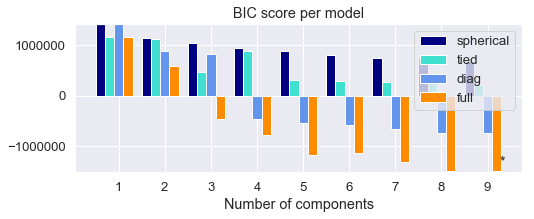

In [28]:
### GMM Clustering
#To find the best component for GMM culstering can be assessed out by a code silimar to doing detemining hyper parameters. This code is from [Gaussian Mixture Model Selection](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py) website. Based on the comparision given in [Clustering](http://scikit-learn.org/stable/modules/clustering.html), GMM method has chosen for having less expences. [GMM method](http://scikit-learn.org/stable/modules/mixture.html#mixture) is the general form of Kmean. 




print(__doc__)


# Generate random sample, two components

lowest_bic = np.infty
bic = []
n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_cluster)
        bic.append(gmm.bic(X_cluster))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [29]:
fraud_class=pd.DataFrame({'fraud_class':clf.predict(X_cluster)})
np.sort(fraud_class.loc[:,'fraud_class'].unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [30]:

data_set['fraud_class']=fraud_class
data_set.head(2)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,hour_click,click_day,...,os_min_time,os_avg_time,channel_count,channel_app_count,channel_max_time,channel_min_time,channel_avg_time,click_time_count,clicker_dt,fraud_class
0,87540,12,1,13,497,2017-11-07 09:30:38,NaT,0,17.5106,7,...,0.0025,38.322178,238,238,71.9689,0.0528,34.734083,1,-1.0,1
1,105560,25,1,17,259,2017-11-07 13:40:27,NaT,0,21.6742,7,...,0.0031,38.354424,3130,804,71.9933,0.0069,36.459822,1,-1.0,8


In [31]:
data_set.groupby('fraud_class').count()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,hour_click,click_day,...,os_max_time,os_min_time,os_avg_time,channel_count,channel_app_count,channel_max_time,channel_min_time,channel_avg_time,click_time_count,clicker_dt
fraud_class,,,,,,,,,,,,,,,,,,,,,
0,12592,12592,12592,12592,12592,12592,22,12592,12592,12592,...,12592,12592,12592,12592,12592,12592,12592,12592,12592,12592
1,19733,19733,19733,19733,19733,19733,13,19733,19733,19733,...,19733,19733,19733,19733,19733,19733,19733,19733,19733,19733
2,21622,21622,21622,21622,21622,21622,13,21622,21622,21622,...,21622,21622,21622,21622,21622,21622,21622,21622,21622,21622
3,2200,2200,2200,2200,2200,2200,1,2200,2200,2200,...,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200
4,2145,2145,2145,2145,2145,2145,6,2145,2145,2145,...,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145
5,8992,8992,8992,8992,8992,8992,12,8992,8992,8992,...,8992,8992,8992,8992,8992,8992,8992,8992,8992,8992
6,15549,15549,15549,15549,15549,15549,143,15549,15549,15549,...,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549
7,8339,8339,8339,8339,8339,8339,13,8339,8339,8339,...,8339,8339,8339,8339,8339,8339,8339,8339,8339,8339
8,8828,8828,8828,8828,8828,8828,4,8828,8828,8828,...,8828,8828,8828,8828,8828,8828,8828,8828,8828,8828


In [32]:
#sns.distplot(data_set.device,color='seagreen')

In [33]:
[str(x) for x in np.sort(fraud_class.loc[:,'fraud_class'].unique())]

['0', '1', '2', '3', '4', '5', '6', '7', '8']

/Users/leilasapple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/leilasapple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


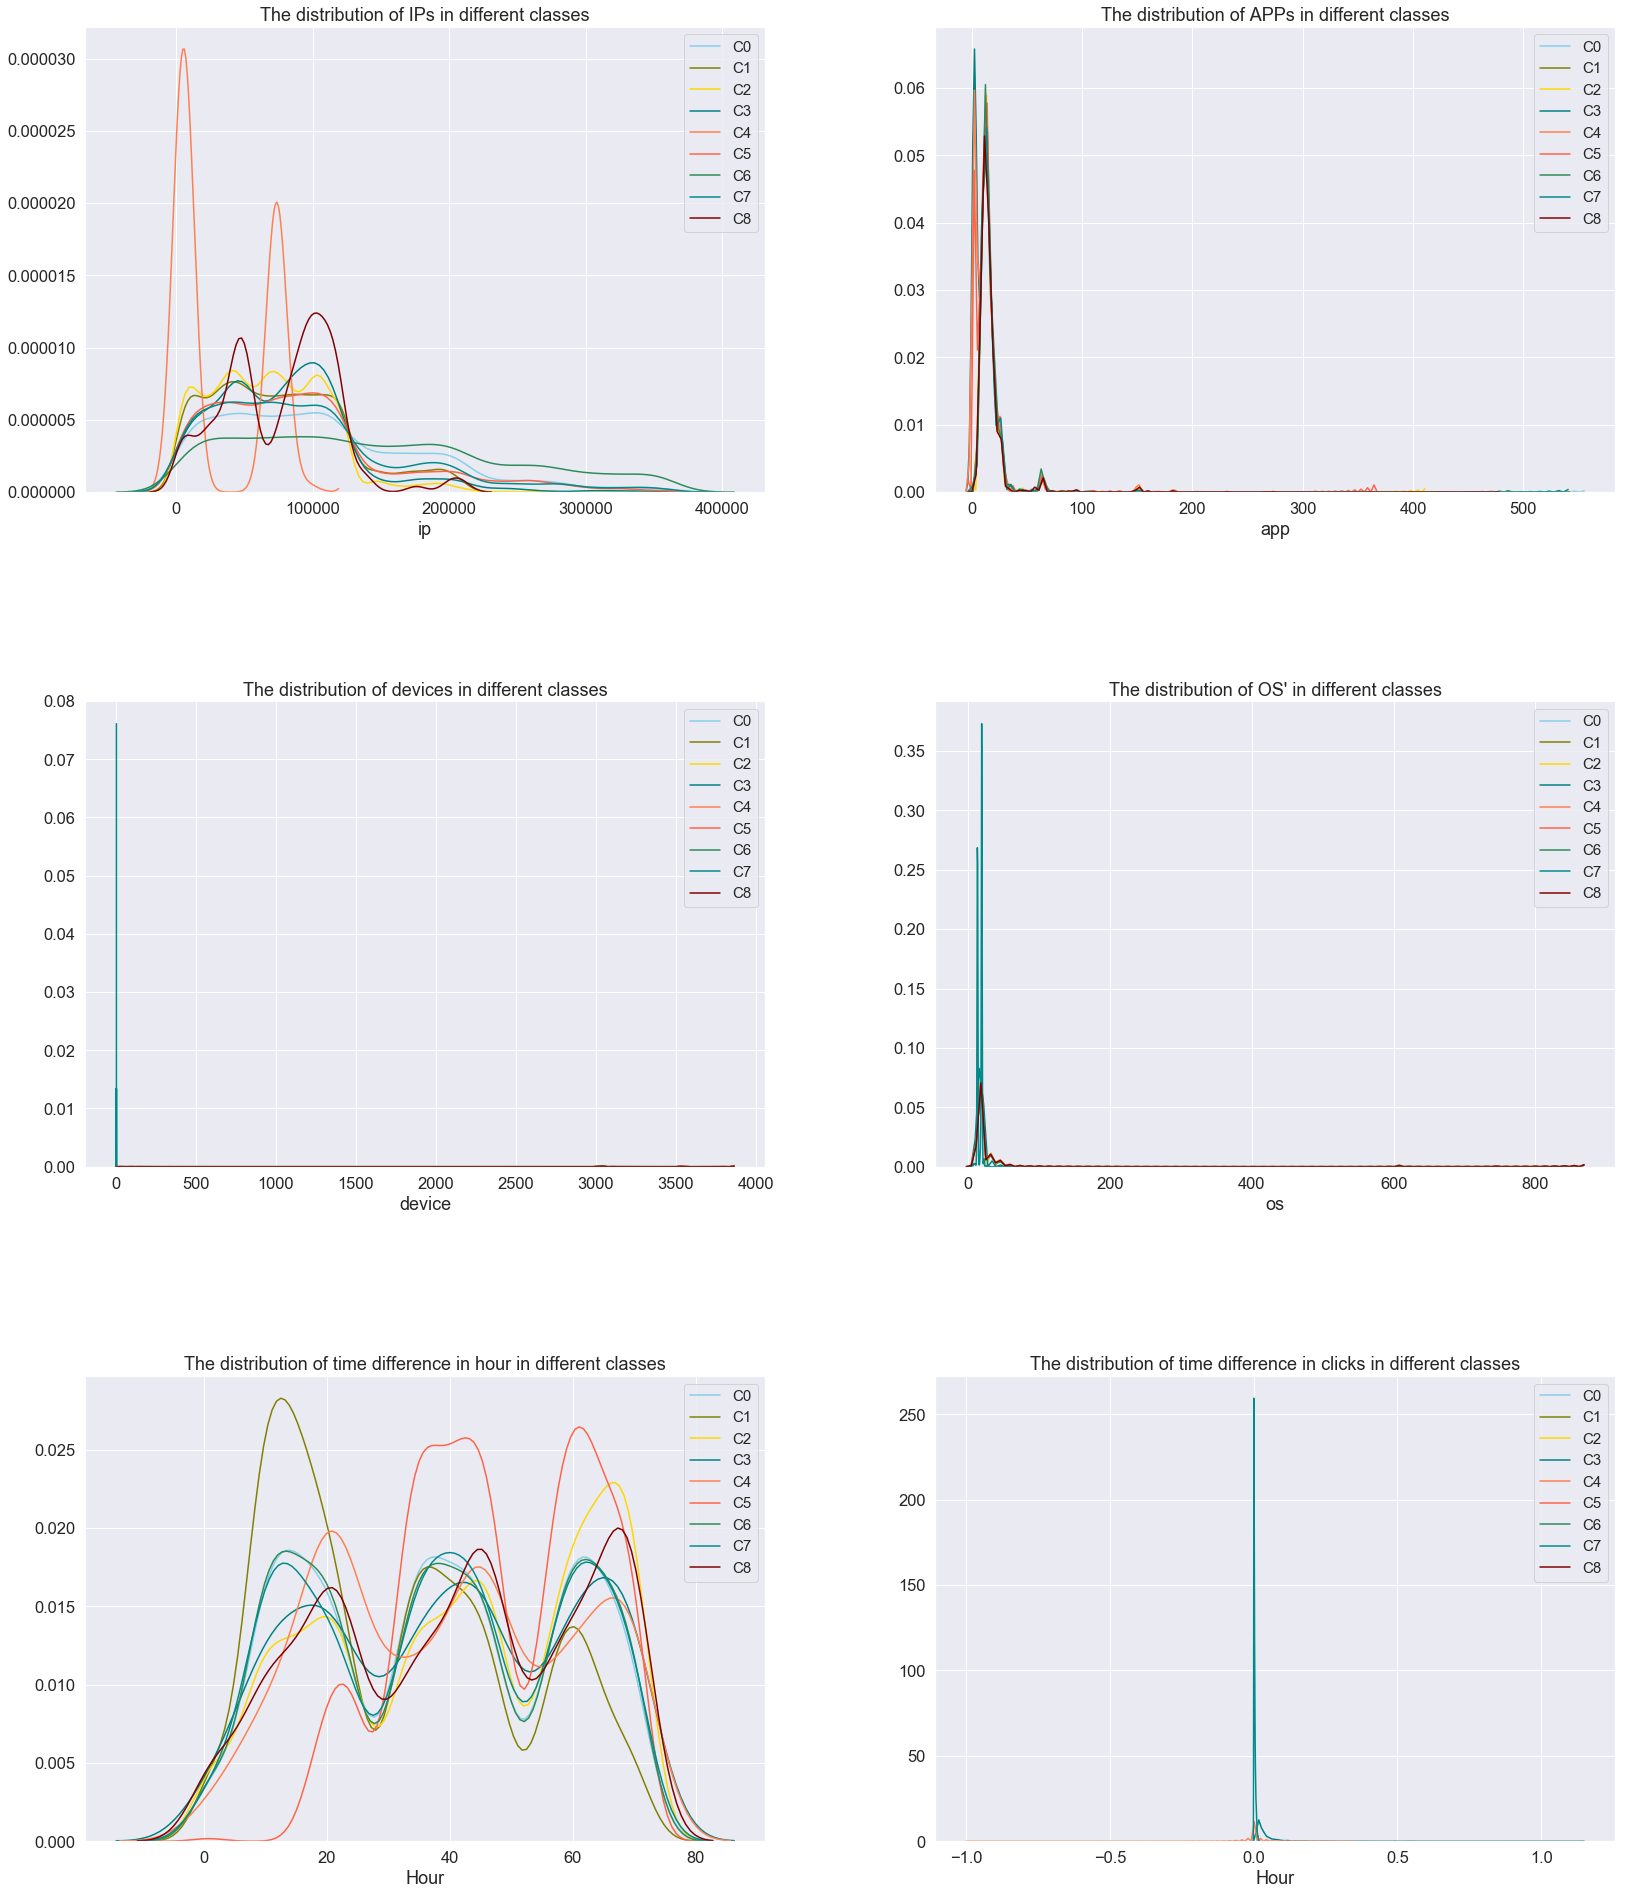

In [34]:
sns.set(font_scale=1.5)
fig,axes=plt.subplots(3,2,figsize=(25,30))
sns.distplot(data_set.ip[data_set.fraud_class==0],color='skyblue',hist=False,ax=axes[0, 0],label='C0')
sns.distplot(data_set.ip[data_set.fraud_class==1],color='olive',hist=False,ax=axes[0, 0],label='C1')
sns.distplot(data_set.ip[data_set.fraud_class==2],color='gold',hist=False,ax=axes[0, 0],label='C2')
sns.distplot(data_set.ip[data_set.fraud_class==3],color='teal',hist=False,ax=axes[0, 0],label='C3')
sns.distplot(data_set.ip[data_set.fraud_class==4],color='coral',hist=False,ax=axes[0, 0],label='C4')
sns.distplot(data_set.ip[data_set.fraud_class==5],color='tomato',hist=False,ax=axes[0, 0],label='C5')
sns.distplot(data_set.ip[data_set.fraud_class==6],color='seagreen',hist=False,ax=axes[0, 0],label='C6')
sns.distplot(data_set.ip[data_set.fraud_class==7],color='darkcyan',hist=False,ax=axes[0, 0],label='C7')
sns.distplot(data_set.ip[data_set.fraud_class==8],color='maroon',hist=False,ax=axes[0, 0],label='C8')
axes[0,0].set_title('The distribution of IPs in different classes')
axes[0,0].legend(fontsize='small')

sns.distplot(data_set.app[data_set.fraud_class==0],color='skyblue',hist=False,ax=axes[0, 1],label='C0')
sns.distplot(data_set.app[data_set.fraud_class==1],color='olive',hist=False,ax=axes[0, 1],label='C1')
sns.distplot(data_set.app[data_set.fraud_class==2],color='gold',hist=False,ax=axes[0, 1],label='C2')
sns.distplot(data_set.app[data_set.fraud_class==3],color='teal',hist=False,ax=axes[0, 1],label='C3')
sns.distplot(data_set.app[data_set.fraud_class==4],color='coral',hist=False,ax=axes[0, 1],label='C4')
sns.distplot(data_set.app[data_set.fraud_class==5],color='tomato',hist=False,ax=axes[0, 1],label='C5')
sns.distplot(data_set.app[data_set.fraud_class==6],color='seagreen',hist=False,ax=axes[0, 1],label='C6')
sns.distplot(data_set.app[data_set.fraud_class==7],color='darkcyan',hist=False,ax=axes[0, 1],label='C7')
sns.distplot(data_set.app[data_set.fraud_class==8],color='maroon',hist=False,ax=axes[0, 1],label='C8')
axes[0,1].set_title('The distribution of APPs in different classes')
axes[0,1].legend(fontsize='small')

sns.distplot(data_set.device[data_set.fraud_class==0],color='skyblue',hist=False,ax=axes[1,0],label='C0')
sns.distplot(data_set.device[data_set.fraud_class==1],color='olive',hist=False,ax=axes[1,0],label='C1')
sns.distplot(data_set.device[data_set.fraud_class==2],color='gold',hist=False,ax=axes[1,0],label='C2')
sns.distplot(data_set.device[data_set.fraud_class==3],color='teal',hist=False,ax=axes[1,0],label='C3')
sns.distplot(data_set.device[data_set.fraud_class==4],color='coral',hist=False,ax=axes[1,0],label='C4')
sns.distplot(data_set.device[data_set.fraud_class==5],color='tomato',hist=False,ax=axes[1,0],label='C5')
sns.distplot(data_set.device[data_set.fraud_class==6],color='seagreen',hist=False,ax=axes[1,0],label='C6')
sns.distplot(data_set.device[data_set.fraud_class==7],color='darkcyan',hist=False,ax=axes[1,0],label='C7')
sns.distplot(data_set.device[data_set.fraud_class==8],color='maroon',hist=False,ax=axes[1,0],label='C8')
axes[1,0].set_title('The distribution of devices in different classes')
axes[1,0].legend(fontsize='small')

sns.distplot(data_set.os[data_set.fraud_class==0],color='skyblue',hist=False,ax=axes[1,1],label='C0')
sns.distplot(data_set.os[data_set.fraud_class==1],color='olive',hist=False,ax=axes[1,1],label='C1')
sns.distplot(data_set.os[data_set.fraud_class==2],color='gold',hist=False,ax=axes[1,1],label='C2')
sns.distplot(data_set.os[data_set.fraud_class==3],color='teal',hist=False,ax=axes[1,1],label='C3')
sns.distplot(data_set.os[data_set.fraud_class==4],color='coral',hist=False,ax=axes[1,1],label='C4')
sns.distplot(data_set.os[data_set.fraud_class==5],color='tomato',hist=False,ax=axes[1,1],label='C5')
sns.distplot(data_set.os[data_set.fraud_class==6],color='seagreen',hist=False,ax=axes[1,1],label='C6')
sns.distplot(data_set.os[data_set.fraud_class==7],color='darkcyan',hist=False,ax=axes[1,1],label='C7')
sns.distplot(data_set.os[data_set.fraud_class==8],color='maroon',hist=False,ax=axes[1,1],label='C8')
axes[1,1].set_title('The distribution of OS\' in different classes')
axes[1,1].legend(fontsize='small')

sns.distplot(data_set.hour_click[data_set.fraud_class==0],color='skyblue',hist=False,ax=axes[2, 0],label='C0')
sns.distplot(data_set.hour_click[data_set.fraud_class==1],color='olive',hist=False,ax=axes[2, 0],label='C1')
sns.distplot(data_set.hour_click[data_set.fraud_class==2],color='gold',hist=False,ax=axes[2, 0],label='C2')
sns.distplot(data_set.hour_click[data_set.fraud_class==3],color='teal',hist=False,ax=axes[2, 0],label='C3')
sns.distplot(data_set.hour_click[data_set.fraud_class==4],color='coral',hist=False,ax=axes[2, 0],label='C4')
sns.distplot(data_set.hour_click[data_set.fraud_class==5],color='tomato',hist=False,ax=axes[2, 0],label='C5')
sns.distplot(data_set.hour_click[data_set.fraud_class==6],color='seagreen',hist=False,ax=axes[2, 0],label='C6')
sns.distplot(data_set.hour_click[data_set.fraud_class==7],color='darkcyan',hist=False,ax=axes[2, 0],label='C7')
sns.distplot(data_set.hour_click[data_set.fraud_class==8],color='maroon',hist=False,ax=axes[2, 0],label='C8')
axes[2,0].set_title('The distribution of time difference in hour in different classes')
axes[2,0].set_xlabel('Hour')
axes[2,0].legend(fontsize='small')

sns.distplot(data_set.clicker_dt[data_set.fraud_class==0],color='skyblue',hist=False,ax=axes[2, 1],label='C0')
sns.distplot(data_set.clicker_dt[data_set.fraud_class==1],color='olive',hist=False,ax=axes[2, 1],label='C1')
sns.distplot(data_set.clicker_dt[data_set.fraud_class==2],color='gold',hist=False,ax=axes[2, 1],label='C2')
sns.distplot(data_set.clicker_dt[data_set.fraud_class==3],color='teal',hist=False,ax=axes[2, 1],label='C3')
sns.distplot(data_set.clicker_dt[data_set.fraud_class==4],color='coral',hist=False,ax=axes[2, 1],label='C4')
sns.distplot(data_set.clicker_dt[data_set.fraud_class==5],color='tomato',hist=False,ax=axes[2, 1],label='C5')
sns.distplot(data_set.clicker_dt[data_set.fraud_class==6],color='seagreen',hist=False,ax=axes[2, 1],label='C6')
sns.distplot(data_set.clicker_dt[data_set.fraud_class==7],color='darkcyan',hist=False,ax=axes[2, 1],label='C7')
sns.distplot(data_set.clicker_dt[data_set.fraud_class==8],color='maroon',hist=False,ax=axes[2, 1],label='C8')
axes[2,1].set_title('The distribution of time difference in clicks in different classes')
axes[2,1].set_xlabel('Hour')
axes[2,1].legend(fontsize='small')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.25)

# Defining dependent and independent features

In [35]:
data_set.keys()

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed', 'hour_click', 'click_day', 'ip_count', 'ip_max_time',
       'ip_min_time', 'ip_avg_time', 'device_count', 'device_max_time',
       'device_min_time', 'device_avg_time', 'app_count', 'app_max_time',
       'app_min_time', 'app_avg_time', 'os_count', 'os_max_time',
       'os_min_time', 'os_avg_time', 'channel_count', 'channel_app_count',
       'channel_max_time', 'channel_min_time', 'channel_avg_time',
       'click_time_count', 'clicker_dt', 'fraud_class'],
      dtype='object')

In [36]:
categorical_features=['ip', 'app', 'device', 'os', 'channel','fraud_class']
temporal_features=['click_time', 'attributed_time', 'hour_click', 'click_day']
numerical_features= ['ip_count', 'ip_max_time',
       'ip_min_time', 'ip_avg_time', 'device_count', 'device_max_time',
       'device_min_time', 'device_avg_time', 'app_count', 'app_max_time',
       'app_min_time', 'app_avg_time', 'os_count', 'os_max_time',
       'os_min_time', 'os_avg_time', 'channel_count', 'channel_app_count',
       'channel_max_time', 'channel_min_time', 'channel_avg_time',
       'click_time_count','clicker_dt']

#selected=['app_min_time','app_max_time','app_count','channel_app_count','channel_count','channel_min_time',\
#          'channel_max_time','channel_avg_time','clicker_dt']
selected=numerical_features+['fraud_class']
print(selected)

['ip_count', 'ip_max_time', 'ip_min_time', 'ip_avg_time', 'device_count', 'device_max_time', 'device_min_time', 'device_avg_time', 'app_count', 'app_max_time', 'app_min_time', 'app_avg_time', 'os_count', 'os_max_time', 'os_min_time', 'os_avg_time', 'channel_count', 'channel_app_count', 'channel_max_time', 'channel_min_time', 'channel_avg_time', 'click_time_count', 'clicker_dt', 'fraud_class']


In [37]:
X=data_set.loc[:,selected]
y=data_set.is_attributed
X.head()


,ip_count,ip_max_time,ip_min_time,ip_avg_time,device_count,device_max_time,device_min_time,device_avg_time,app_count,app_max_time,...,os_min_time,os_avg_time,channel_count,channel_app_count,channel_max_time,channel_min_time,channel_avg_time,click_time_count,clicker_dt,fraud_class
0,8,61.1872,9.8764,22.965525,94338,71.9975,0.0,38.470187,13198,71.9950,...,0.0025,38.322178,238,238,71.9689,0.0528,34.734083,1,-1.0,1
1,149,71.9906,0.0331,34.598678,94338,71.9975,0.0,38.470187,804,71.8692,...,0.0031,38.354424,3130,804,71.9933,0.0069,36.459822,1,-1.0,8
2,2,42.1833,26.0900,34.136650,94338,71.9975,0.0,38.470187,13198,71.9950,...,0.0000,38.210694,635,135,71.8658,0.0306,36.297181,2,-1.0,0
3,3,66.4069,7.6900,29.021933,94338,71.9975,0.0,38.470187,2422,71.9975,...,0.0025,38.322178,3960,1627,71.9975,0.0344,38.258543,2,-1.0,1
4,4,65.0025,18.9800,48.751175,94338,71.9975,0.0,38.470187,13198,71.9950,...,0.0128,39.146451,2936,2608,71.9508,0.0000,36.307000,1,-1.0,2


## Splitting data into validation and training sets

In [38]:
from sklearn.model_selection import train_test_split

X_tv,X_test,y_tv,y_test=train_test_split(X,y,test_size=0.15, random_state=42)
X_train,X_validation,y_train,y_validation=train_test_split(X_tv,y_tv,test_size=0.15, random_state=42)

In [39]:
print(np.shape(X_train),np.size(X_validation))

(72250, 24) 306000


In [40]:
X_train.head()

,ip_count,ip_max_time,ip_min_time,ip_avg_time,device_count,device_max_time,device_min_time,device_avg_time,app_count,app_max_time,...,os_min_time,os_avg_time,channel_count,channel_app_count,channel_max_time,channel_min_time,channel_avg_time,click_time_count,clicker_dt,fraud_class
2711,14,70.2156,21.4089,50.779407,94338,71.9975,0.0,38.470187,18279,71.9906,...,0.0197,38.208667,8114,7833,71.9719,0.0392,38.389363,2,-1.0,2
28926,25,71.5139,2.0578,39.207248,94338,71.9975,0.0,38.470187,11737,71.9694,...,0.0453,38.598745,3960,2012,71.9975,0.0344,38.258543,1,-1.0,8
14744,74,71.0192,3.6328,43.301158,94338,71.9975,0.0,38.470187,981,71.9925,...,0.0025,38.322178,1180,981,71.9925,8.9325,52.564910,1,-1.0,8
21221,112,71.9928,5.6942,45.015348,94338,71.9975,0.0,38.470187,18279,71.9906,...,0.0064,38.445310,776,633,71.9961,0.1658,37.655004,2,-1.0,8
97320,7,63.6783,9.5469,37.497329,94338,71.9975,0.0,38.470187,2004,71.9942,...,0.0181,38.229619,1964,1702,71.9950,0.0025,39.250619,2,-1.0,1


In [41]:
type(X_train)

pandas.core.frame.DataFrame

## Dealing with categorical data

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X_train.loc[:, 'fraud_class'] = labelencoder_X.fit_transform(X_train.loc[:,'fraud_class'])
onehotencoder = OneHotEncoder(categorical_features = [23])
X_train = onehotencoder.fit_transform(X_train)


/Users/leilasapple/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/leilasapple/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/leilasapple/anacond

In [43]:
type(y_train)

pandas.core.series.Series

# Imbalanced data

## SMOTE sampling data

In [44]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [45]:
print(sum(y_resampled==0),sum(y_resampled==1))
print(sum(X_resampled[:,1]==-1),sum(X_resampled[:,1]!=-1))

72086 72086


/Users/leilasapple/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: SparseEfficiencyWarning: Comparing a sparse matrix with a nonzero scalar using != is inefficient, try using == instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


   (0, 0)	True


In [46]:
numerical_features+np.arange(9).astype(str).tolist()

['ip_count',
 'ip_max_time',
 'ip_min_time',
 'ip_avg_time',
 'device_count',
 'device_max_time',
 'device_min_time',
 'device_avg_time',
 'app_count',
 'app_max_time',
 'app_min_time',
 'app_avg_time',
 'os_count',
 'os_max_time',
 'os_min_time',
 'os_avg_time',
 'channel_count',
 'channel_app_count',
 'channel_max_time',
 'channel_min_time',
 'channel_avg_time',
 'click_time_count',
 'clicker_dt',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8']

                   importance
channel_min_time     0.215915
channel_max_time     0.198555
channel_app_count    0.133572
5                    0.099222
3                    0.083700
2                    0.055929
device_min_time      0.054171
4                    0.031401
app_max_time         0.023299
6                    0.022997
click_time_count     0.013653
channel_avg_time     0.011347
os_avg_time          0.009544
0                    0.007948
app_min_time         0.005550
ip_count             0.004798
device_max_time      0.004309
ip_min_time          0.004191
7                    0.004054
clicker_dt           0.003230
ip_max_time          0.002148
app_avg_time         0.001797
device_count         0.001627
app_count            0.001469
8                    0.001299
os_min_time          0.001041
os_max_time          0.001015
channel_count        0.000724
device_avg_time      0.000647
1                    0.000525
os_count             0.000311
ip_avg_time          0.000010


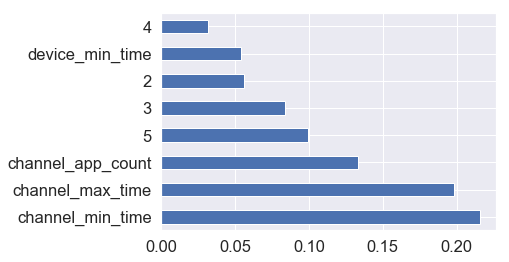

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0, n_jobs=-1, class_weight="balanced")
clf.fit(X_resampled, y_resampled)  
feature_importances = pd.DataFrame(clf.feature_importances_,index = numerical_features+np.arange(9).astype(str).tolist()\
                                   ,columns=['importance']).sort_values('importance',ascending=False)
indices = np.argsort(feature_importances)[::-1]
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)

print(feature_importances)

feat_importances = pd.Series(clf.feature_importances_, index=numerical_features+np.arange(9).astype(str).tolist())
feat_importances.nlargest(8).plot(kind='barh')

## Building the XGBoosting model

In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,roc_curve


In [49]:
model = XGBClassifier()
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Labeling test set

In [52]:
X_test.head()

,ip_count,ip_max_time,ip_min_time,ip_avg_time,device_count,device_max_time,device_min_time,device_avg_time,app_count,app_max_time,...,os_min_time,os_avg_time,channel_count,channel_app_count,channel_max_time,channel_min_time,channel_avg_time,click_time_count,clicker_dt,fraud_class
75721,94,71.9042,5.5394,49.475070,94338,71.9975,0.0,38.470187,5359,71.9956,...,0.1039,37.950436,1468,496,71.9706,0.0178,38.268441,1,-1.0,8
80184,4,64.7867,48.5092,53.505225,94338,71.9975,0.0,38.470187,11737,71.9694,...,0.0256,39.934520,3960,2012,71.9975,0.0344,38.258543,3,-1.0,5
19864,2,70.6878,65.8411,68.264450,94338,71.9975,0.0,38.470187,1927,71.9947,...,0.0064,39.441039,398,163,71.6022,0.0353,38.580013,1,-1.0,0
76699,1,66.8603,66.8603,66.860300,94338,71.9975,0.0,38.470187,1454,71.9869,...,0.0025,38.322178,2954,1415,71.9647,0.0031,38.422552,1,-1.0,6
92991,22,70.9094,1.5328,35.425495,94338,71.9975,0.0,38.470187,1633,71.9644,...,0.0978,39.093256,2472,782,71.9836,0.0086,38.690980,1,-1.0,2


In [53]:
X_test.loc[:, 'fraud_class'] = labelencoder_X.fit_transform(X_test.loc[:,'fraud_class'])
onehotencoder = OneHotEncoder(categorical_features = [23])
X_test = onehotencoder.fit_transform(X_test)


/Users/leilasapple/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/leilasapple/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/leilasapple/anacond

### Evaluation

In [58]:
y_pred_XG = model.predict(X_test)
print('XGboosing:\n',accuracy_score(y_test, y_pred_XG),roc_auc_score(y_test, y_pred_XG),\
      precision_score(y_test.values, y_pred_XG),recall_score(y_test.values, y_pred_XG))
y_pred_RF = clf.predict(X_test)
print('RF:\n',accuracy_score(y_test, y_pred_RF),roc_auc_score(y_test, y_pred_RF),precision_score(y_test.values, y_pred_RF),\
      recall_score(y_test.values, y_pred_RF))

XGboosing:
 0.9924666666666667 0.8781034761747303 0.21804511278195488 0.7631578947368421
RF:
 0.9766666666666667 0.9358057957351607 0.08947368421052632 0.8947368421052632


No handles with labels found to put in legend.


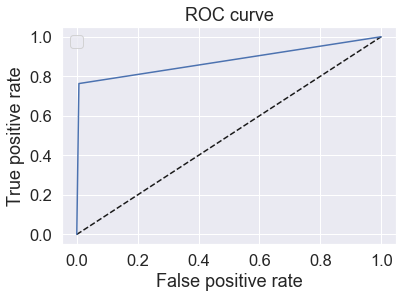

In [59]:
fpr, tpr, _ = roc_curve(y_test, y_pred_XG)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


## Test set

In [ ]:
data_test=pd.read_csv('../Fraud Detection/test_supplement.csv')

In [ ]:
data_test.head()

In [ ]:
data_test['attributed_time']=None
data_test['is_attributed']=None
data_test.head()

In [ ]:
common=(data_set[['ip','app','device','os','channel']].isin(data_test[['ip','app','device','os','channel']])\
.sum(axis=1)==5)
data_set.loc[common,['ip','app','device','os','channel','attributed_time','is_attributed']]